Nama : Angelina Nirmala Puteri Dika Praktiko

NPM  : 24083010055

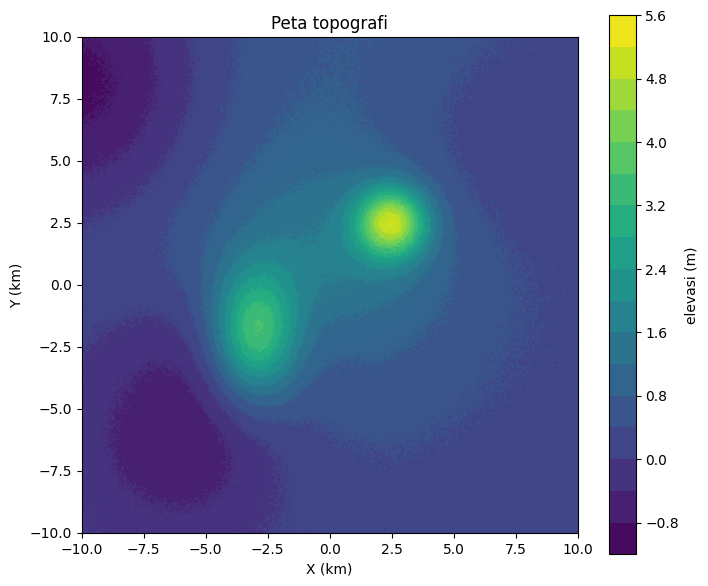

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

NPM=55
np.random.seed(NPM)

nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)


def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = peak(-3, -2, 1.2, 1.8, 3.2) + peak(2.5, 2.5, 1.0, 1.0, 4) + peak(0, 0, 3.5, 3.5, 1.2) \
    + peak(6, 6, 4, 4, -0.6)  + peak(-10, 8, 3.5, 3.5, -1.2) +  peak(-6, -6, 3, 3, -1.0) \
    + peak(-2, -2, 4, 2, -0.6)  + peak(2.5, 9.5, 6, 6, 0.75)


Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))


Z += 0.05 * np.random.randn(*Z.shape)


fig, ax = plt.subplots(figsize=(8, 7))
levels = 18
cf = ax.contourf(X, Y, Z, levels=levels)
cs = ax.contour(X, Y, Z, levels=levels, linewidths=0.6)
ax.clabel(cs, fmt="%.1f", fontsize=8)
ax.set_title("Peta topografi")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="elevasi (m)")



#1) cari titik tertinggi global  

Titik tertinggi global:
  X = 2.448
  Y = 2.465
  Z = 5.181


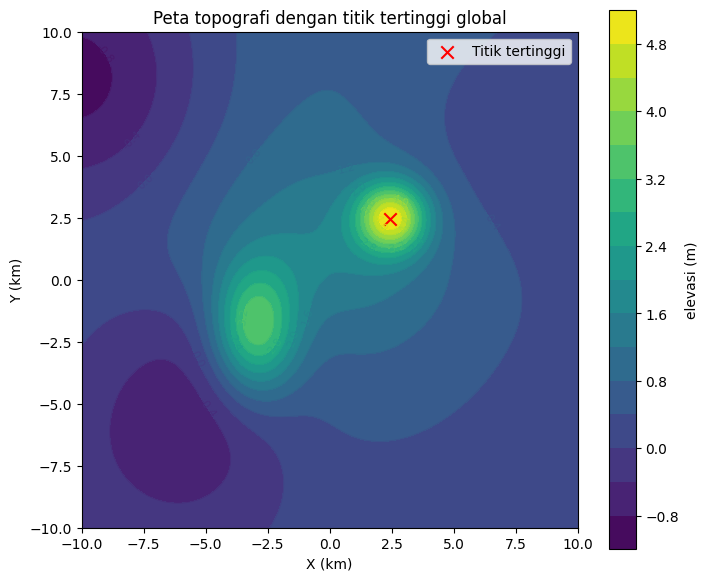

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

NPM = 55
np.random.seed(NPM)


nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)


def peak(x0, y0, sx, sy, amp, X, Y):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))


def topo_func(pos):
    x, y = pos
    Z = (
        peak(-3, -2, 1.2, 1.8, 3.2, x, y)
        + peak(2.5, 2.5, 1.0, 1.0, 4, x, y)
        + peak(0, 0, 3.5, 3.5, 1.2, x, y)
        + peak(6, 6, 4, 4, -0.6, x, y)
        + peak(-10, 8, 3.5, 3.5, -1.2, x, y)
        + peak(-6, -6, 3, 3, -1.0, x, y)
        + peak(-2, -2, 4, 2, -0.6, x, y)
        + peak(2.5, 9.5, 6, 6, 0.75, x, y)
        + 0.5 * np.exp(-(np.sqrt((x/20)**2 + (y/10)**2)))
    )
    return Z


def neg_topo(pos):
    return -topo_func(pos)


bounds = [(-10, 10), (-10, 10)]


result = differential_evolution(neg_topo, bounds, seed=NPM)
x_max, y_max = result.x
z_max = topo_func((x_max, y_max))

print(f"Titik tertinggi global:")
print(f"  X = {x_max:.3f}")
print(f"  Y = {y_max:.3f}")
print(f"  Z = {z_max:.3f}")


Z = (
    peak(-3, -2, 1.2, 1.8, 3.2, X, Y)
    + peak(2.5, 2.5, 1.0, 1.0, 4, X, Y)
    + peak(0, 0, 3.5, 3.5, 1.2, X, Y)
    + peak(6, 6, 4, 4, -0.6, X, Y)
    + peak(-10, 8, 3.5, 3.5, -1.2, X, Y)
    + peak(-6, -6, 3, 3, -1.0, X, Y)
    + peak(-2, -2, 4, 2, -0.6, X, Y)
    + peak(2.5, 9.5, 6, 6, 0.75, X, Y)
    + 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
)

fig, ax = plt.subplots(figsize=(8,7))
levels = 18
cf = ax.contourf(X, Y, Z, levels=levels)
cs = ax.contour(X, Y, Z, levels=levels, linewidths=0.6)
ax.clabel(cs, fmt="%.1f", fontsize=8)
ax.scatter(x_max, y_max, c='red', s=80, marker='x', label='Titik tertinggi')
ax.legend()
ax.set_title("Peta topografi dengan titik tertinggi global")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="elevasi (m)")
plt.show()


Menunjukkan hasil identifikasi titik tertinggi pada permukaan topografi yang merepresentasikan variasi elevasi suatu permukaan tanah dengan beberapa puncak dan lembah. Melalui metode optimasi differential evolution, algoritma secara adaptif mencari koordinat dengan nilai elevasi maksimum di seluruh area, meskipun permukaannya kompleks dan tidak teratur. Titik tertinggi yang ditemukan menunjukkan posisi dominan yang berpotensi menjadi puncak utama daerah tersebut.

#2) cari titik aliran 'sungai' menuju titik terendah, asumsikan jika 'hujan' langsung mengalir dan tidak terserap ke tanah

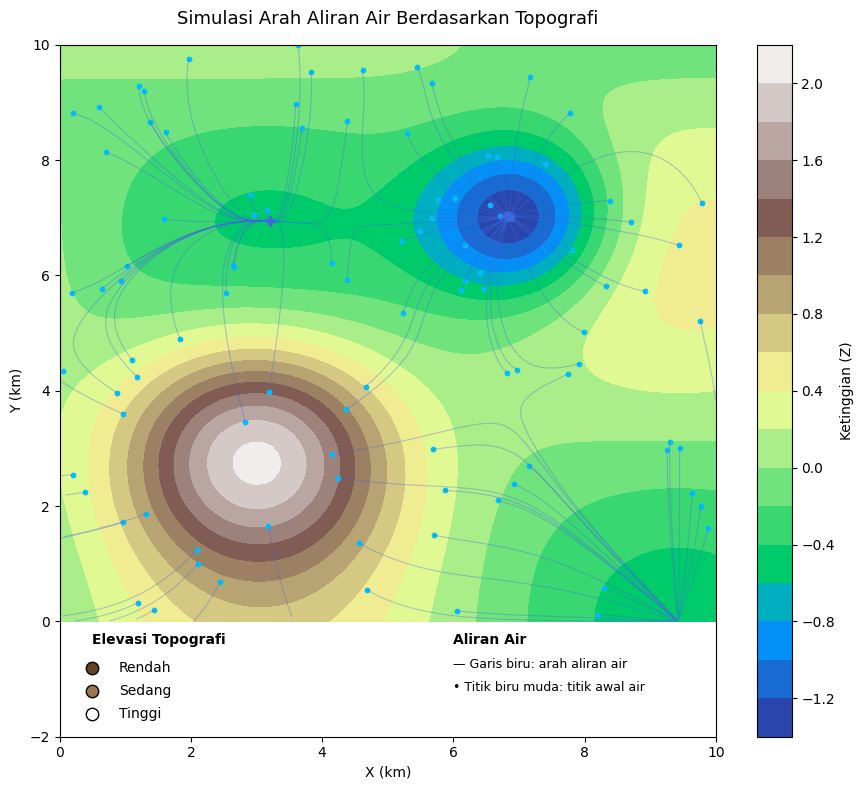

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)

Z = (
    2 * np.exp(-((X-3)**2 + (Y-3)**2)/4)
    - 1.5 * np.exp(-((X-7)**2 + (Y-7)**2)/2)
    + 0.5 * np.sin(0.5*X) * np.cos(0.5*Y)
)


dZdx, dZdy = np.gradient(Z, x, y)
spline = RectBivariateSpline(x, y, Z.T)


np.random.seed(0)
n_particles = 100
start_x = np.random.uniform(0, 10, n_particles)
start_y = np.random.uniform(0, 10, n_particles)
positions = np.vstack([start_x, start_y]).T


trajectories = []
for pos in positions:
    path = [pos]
    for _ in range(80):
        x0, y0 = path[-1]
        dzdx = spline(x0, y0, dx=1, dy=0)[0, 0]
        dzdy = spline(x0, y0, dx=0, dy=1)[0, 0]
        grad = np.array([dzdx, dzdy])
        step = -0.1 * grad / (np.linalg.norm(grad) + 1e-6)
        new_pos = path[-1] + step
        if not (0 <= new_pos[0] <= 10 and 0 <= new_pos[1] <= 10):
            break
        path.append(new_pos)
    trajectories.append(np.array(path))


plt.figure(figsize=(9, 8))
contour = plt.contourf(X, Y, Z, levels=20, cmap='terrain')
plt.colorbar(contour, label='Ketinggian (Z)')


for traj in trajectories:
    plt.plot(traj[:, 0], traj[:, 1], color='royalblue', alpha=0.35, linewidth=0.8)


plt.scatter(start_x, start_y, color='deepskyblue', s=10, label='Titik awal air')


legend_x = [0.5, 0.5, 0.5]
legend_y = [-0.8, -1.2, -1.6]
colors = ['#654321', '#9b7653', '#ffffff']
labels = ['Rendah', 'Sedang', 'Tinggi']

for (lx, ly, c, label) in zip(legend_x, legend_y, colors, labels):
    plt.scatter(lx, ly, color=c, s=80, edgecolor='black')
    plt.text(lx+0.4, ly, label, va='center', fontsize=10)

plt.text(0.5, -0.4, "Elevasi Topografi", fontsize=10, weight='bold')


plt.text(6, -0.4, "Aliran Air", fontsize=10, weight='bold')
plt.text(6, -0.8, "— Garis biru: arah aliran air", fontsize=9)
plt.text(6, -1.2, "• Titik biru muda: titik awal air", fontsize=9)


plt.title("Simulasi Arah Aliran Air Berdasarkan Topografi", fontsize=13, pad=15)
plt.xlabel("X (km)")
plt.ylabel("Y (km)")
plt.xlim(0, 10)
plt.ylim(-2, 10)
plt.grid(False)
plt.tight_layout()
plt.show()



Menggambarkan simulasi aliran air menuju titik terendah dari suatu permukaan topografi. area berwarna putih menunjukkan titik tertinggi seperti puncak bukit, sedangkan warna cokelat muda hingga gelap menunjukkan daerah yang lebih rendah atau lembah. Selain itu, dapat terlihat gairs0garis berwarna biru menggambarkan arah aliran air yang bergerak dari daerah dengan elevasi tinggi menuju daerah rendah, mengikuti gradien topografi alami. Titik-titik berwarna biru muda menandakan titik awal air yang mengalirdan secara bertahap turun menuju lembah utama.

#3) kerawanan erosi ditentukan oleh kecuraman lereng, hitung skor kerawanan di tiap titik

=== Statistik Skor Kerawanan Erosi ===
   min: 0.0000
   25%: 0.0071
median: 0.0144
   75%: 0.0240
   max: 0.2500


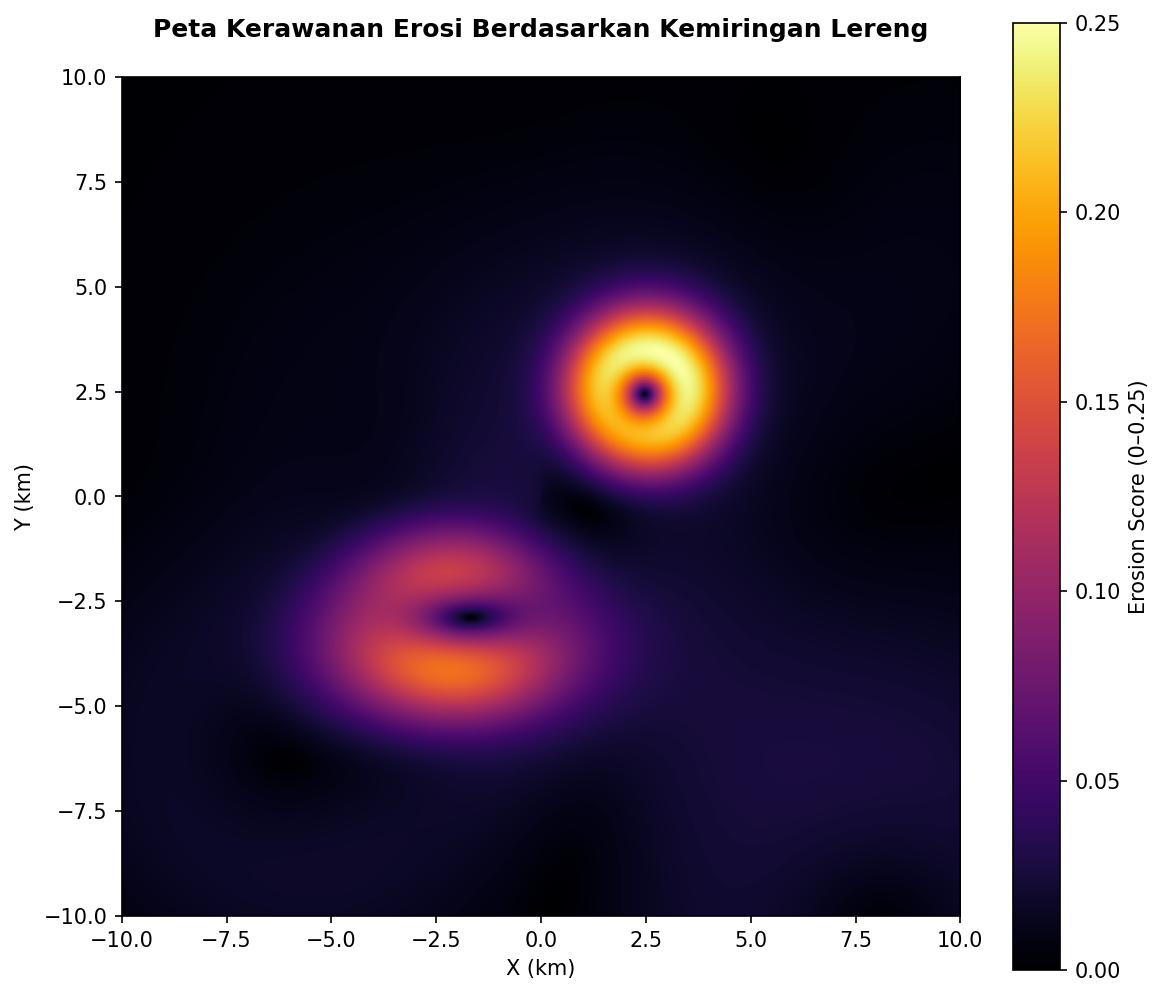

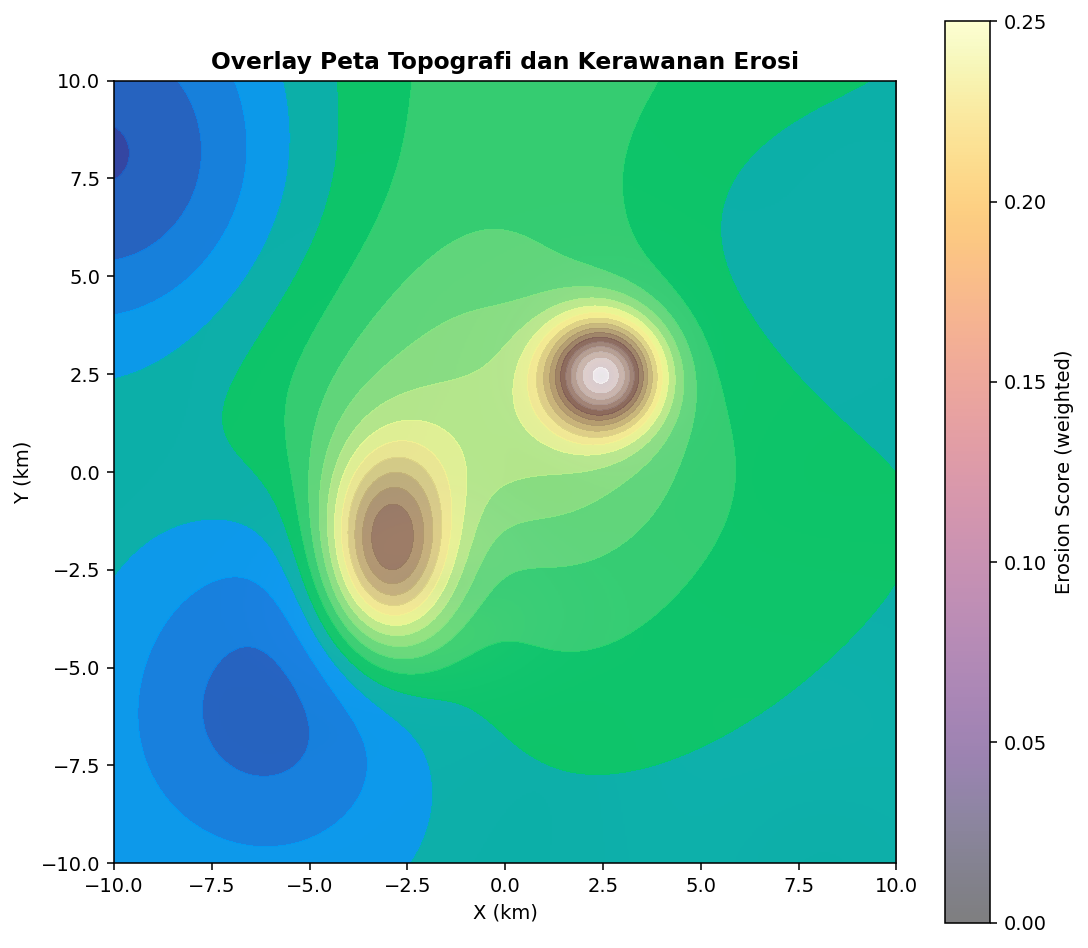

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def turunan_parsial(Z, dx, dy):

    dZdx = np.zeros_like(Z)
    dZdy = np.zeros_like(Z)


    dZdx[:, 1:-1] = (Z[:, 2:] - Z[:, :-2]) / (2 * dx)
    dZdy[1:-1, :] = (Z[2:, :] - Z[:-2, :]) / (2 * dy)


    dZdx[:, 0] = (Z[:, 1] - Z[:, 0]) / dx
    dZdx[:, -1] = (Z[:, -1] - Z[:, -2]) / dx
    dZdy[0, :] = (Z[1, :] - Z[0, :]) / dy
    dZdy[-1, :] = (Z[-1, :] - Z[-2, :]) / dy

    return dZdx, dZdy



dx = (x[1] - x[0]) * 1000
dy = (y[1] - y[0]) * 1000
dZdx, dZdy = turunan_parsial(Z, dx, dy)


kemiringan = np.sqrt(dZdx**2 + dZdy**2)


def normalize_minmax(A):
    amin = np.nanmin(A)
    amax = np.nanmax(A)
    return (A - amin) / (amax - amin) if amax > amin else np.zeros_like(A)

kemiringan_norm = normalize_minmax(kemiringan)


bobot = 0.25
erosion_score = kemiringan_norm * bobot



def stats(A):
    return {
        "min": np.nanmin(A),
        "25%": np.nanpercentile(A, 25),
        "median": np.nanmedian(A),
        "75%": np.nanpercentile(A, 75),
        "max": np.nanmax(A)
    }

print("=== Statistik Skor Kerawanan Erosi ===")
for k, v in stats(erosion_score).items():
    print(f"{k:>6}: {v:.4f}")



plt.figure(figsize=(8,7), dpi=150)
plt.imshow(erosion_score.T, origin='lower',
           extent=[x.min(), x.max(), y.min(), y.max()],
           cmap='inferno', vmin=0, vmax=bobot)
plt.colorbar(label='Erosion Score (0–0.25)')
plt.title("Peta Kerawanan Erosi Berdasarkan Kemiringan Lereng\n", fontsize=12, weight='bold')
plt.xlabel("X (km)")
plt.ylabel("Y (km)")
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()



plt.figure(figsize=(8,7), dpi=140)
plt.contourf(X, Y, Z, levels=20, cmap='terrain', alpha=0.9)
plt.imshow(erosion_score.T, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()],
           cmap='inferno', alpha=0.5, vmin=0, vmax=bobot)
plt.colorbar(label='Erosion Score (weighted)')
plt.title("Overlay Peta Topografi dan Kerawanan Erosi", fontsize=12, weight='bold')
plt.xlabel("X (km)")
plt.ylabel("Y (km)")
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()


Menggambarkan tingkat kerawanan erosi yang dihitung berdasarkan kemiringan lereng dari data topografi. Model ini menilai perubahan elevasi di setiap arah untuk menentukan sebeerapa curam permukaan tanah pada setiap titik. Secara umum, semakin curam lereng suatu area, semakin tinggi pula risiko erosi yang dapat terjadi akibat gaya gravitasi dan aliran air permukaan. Peta hasil menunjukkan distribusi kerawanan tersebut, di mana warna terang menandakan area dengan potensi erosi tinggi, sementara warna gelap menunjukkan daerah yang relatif stabil.

#4


##a) jika tanah hendak diratakan, berapa banyak volume tanah yang harus dipindahkan? (dipotong dari puncak dan diurug ke lembah)

Ketinggian target rata-rata tanah     : 0.5016 meter
Luas tiap grid cell                    : 2512.55 m²
Volume tanah yang dipotong (cut)       : 1.10e+08 m³
Volume tanah yang diurug (fill)        : 1.10e+08 m³
Volume cut & fill setelah bobot (1.26) : 1.38e+08 m³ dan 1.38e+08 m³


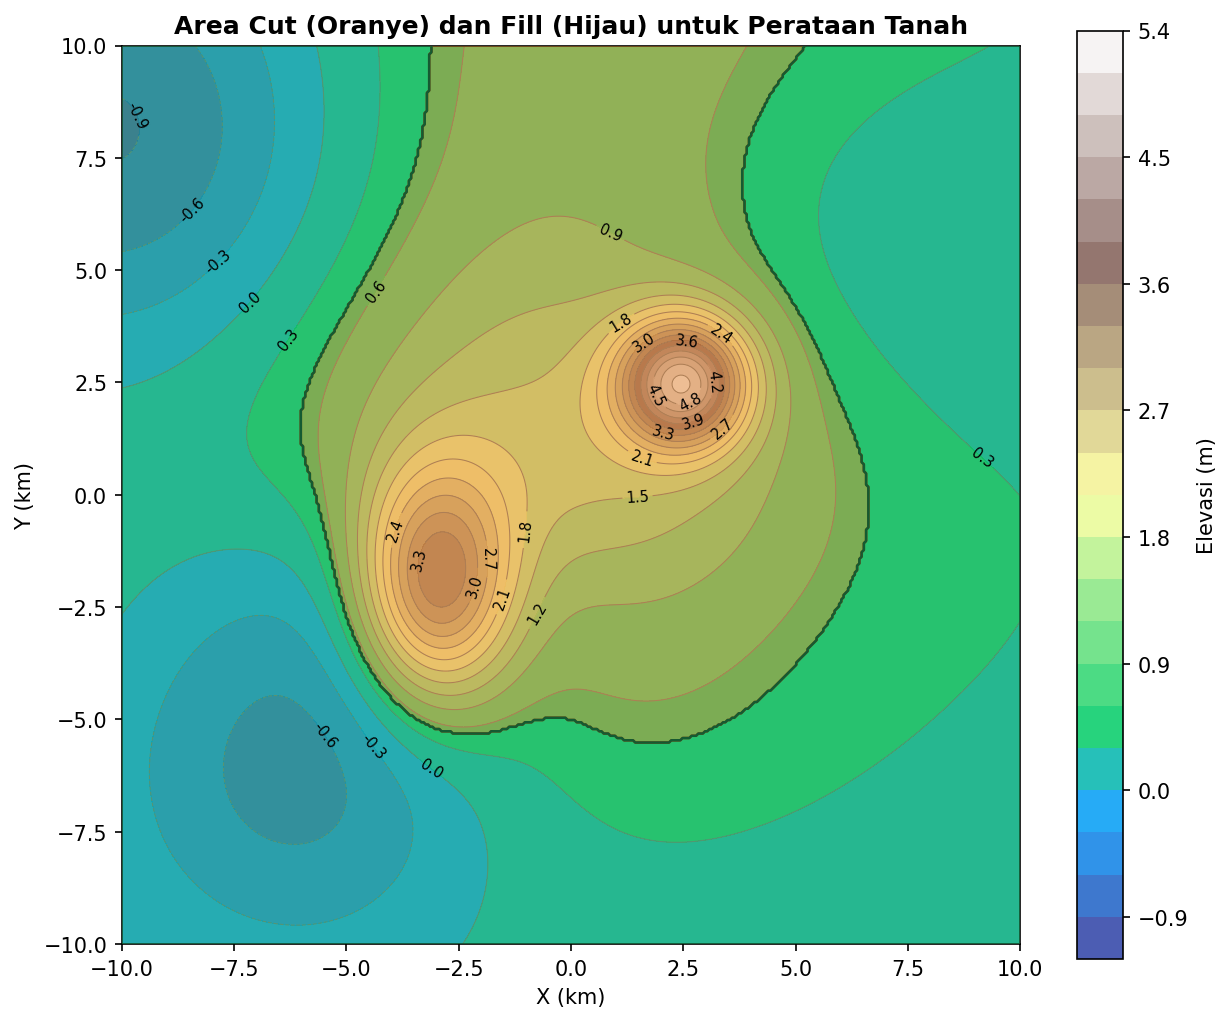

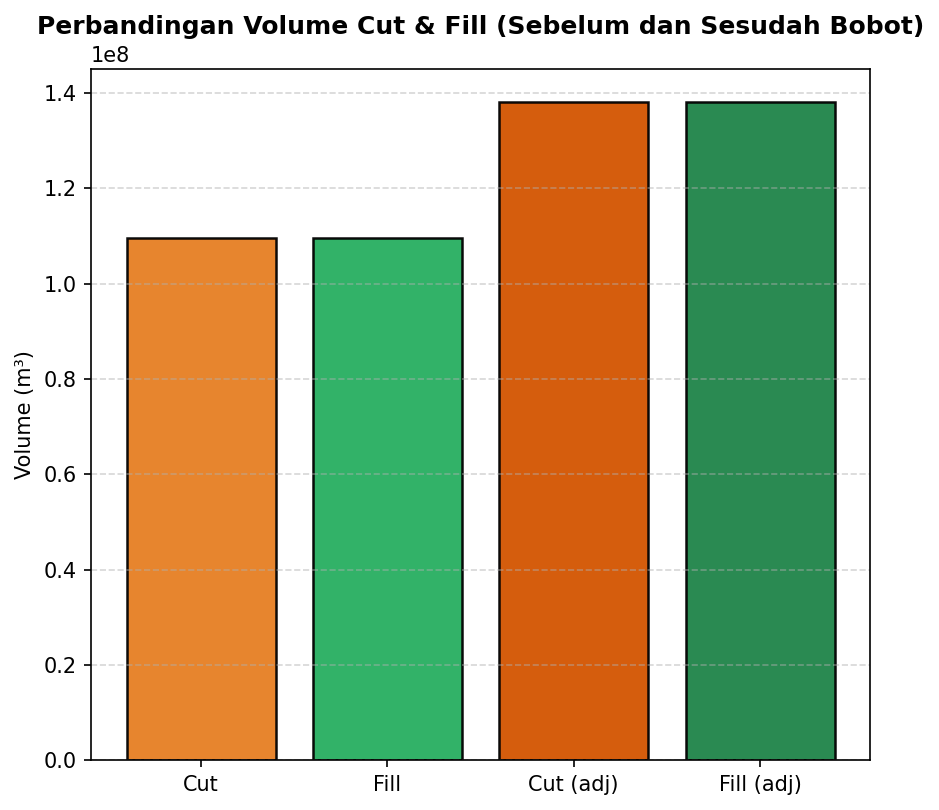

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


h_target = Z.mean()

dx = (x[1] - x[0]) * 1000
dy = (y[1] - y[0]) * 1000
cell_area = dx * dy


cut_volume = np.sum((Z - h_target)[Z > h_target]) * cell_area
fill_volume = np.sum((h_target - Z)[Z < h_target]) * cell_area


bobot = 1.20 * 1.05
cut_adjusted = cut_volume * bobot
fill_adjusted = fill_volume * bobot


print(f"Ketinggian target rata-rata tanah     : {h_target:.4f} meter")
print(f"Luas tiap grid cell                    : {cell_area:.2f} m²")
print(f"Volume tanah yang dipotong (cut)       : {cut_volume:.2e} m³")
print(f"Volume tanah yang diurug (fill)        : {fill_volume:.2e} m³")
print(f"Volume cut & fill setelah bobot (1.26) : {cut_adjusted:.2e} m³ dan {fill_adjusted:.2e} m³")


fig, ax = plt.subplots(figsize=(8.5, 7), dpi=150)
levels = 20
cf = ax.contourf(X, Y, Z, levels=levels, cmap='terrain', alpha=0.85)
cs = ax.contour(X, Y, Z, levels=levels, colors='gray', linewidths=0.5)

ax.clabel(cs, fmt="%.1f", fontsize=7, colors='black')


ax.contourf(X, Y, Z > h_target, levels=[0.5, 1],
             colors=['#E67E22'], alpha=0.45, zorder=3)
ax.contour(X, Y, Z > h_target, levels=[0.5], colors='#A04000', linewidths=1.2, zorder=4)

ax.contourf(X, Y, Z < h_target, levels=[0.5, 1],
             colors=['#27AE60'], alpha=0.45, zorder=3)
ax.contour(X, Y, Z < h_target, levels=[0.5], colors='#145A32', linewidths=1.2, zorder=4)

plt.colorbar(cf, ax=ax, label="Elevasi (m)")
ax.set_title("Area Cut (Oranye) dan Fill (Hijau) untuk Perataan Tanah", fontsize=12, fontweight='bold')
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 5.5), dpi=150)
bars = ['Cut', 'Fill', 'Cut (adj)', 'Fill (adj)']
values = [cut_volume, fill_volume, cut_adjusted, fill_adjusted]
colors = ['#E67E22', '#27AE60', '#D35400', '#1E8449']

plt.bar(bars, values, color=colors, edgecolor='black', linewidth=1.2, alpha=0.95)
plt.ylabel("Volume (m³)")
plt.title("Perbandingan Volume Cut & Fill (Sebelum dan Sesudah Bobot)", fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Menggambarkan analisis volume tanah yang perlu dipindahkan agar permukaan lahan menjadi rata pada ketinggian rata-rata tertentu. Nilai elevasi rata-rata dijadikan sebagai tinggi target perataan, dan dihitungg berapa banyak tanah yang harus dipotong (cut) dari area yang lebih tinggi dan diurug (fill) ke area yang lebih rendah. Visualisasi memperlihatkan zona oranye sebagai wilayah yang perlu dipotong dan zona hijau sebagai area yang perlu diisi.

##b) berapa ketinggian akhir tanah yang rata tersebut?

Ketinggian akhir tanah setelah diratakan: 0.5016 meter (rata-rata elevasi area)


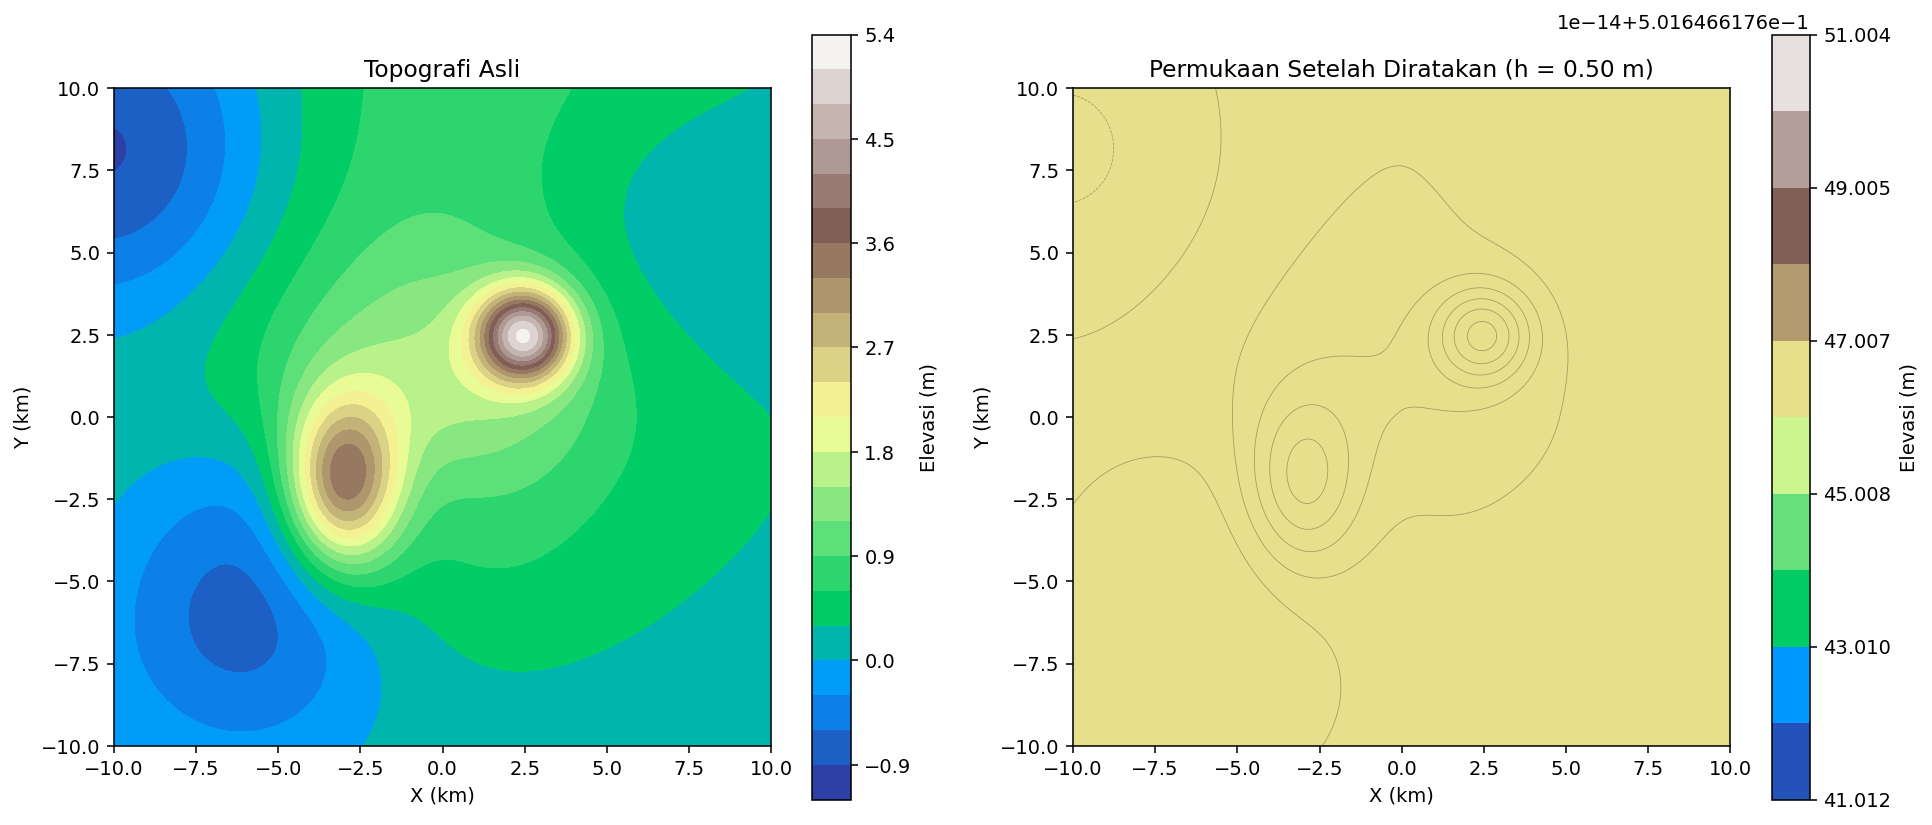

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


h_rata = Z.mean()


print(f"Ketinggian akhir tanah setelah diratakan: {h_rata:.4f} meter (rata-rata elevasi area)")


Z_flat = np.full_like(Z, h_rata)


fig, ax = plt.subplots(1, 2, figsize=(14, 6), dpi=140)


cf1 = ax[0].contourf(X, Y, Z, levels=20, cmap='terrain')
ax[0].set_title("Topografi Asli")
ax[0].set_xlabel("X (km)")
ax[0].set_ylabel("Y (km)")
ax[0].set_aspect('equal')
plt.colorbar(cf1, ax=ax[0], label="Elevasi (m)")


cf2 = ax[1].contourf(X, Y, Z_flat, levels=10, cmap='terrain')
ax[1].contour(X, Y, Z, colors='k', linewidths=0.4, alpha=0.3)
ax[1].set_title(f"Permukaan Setelah Diratakan (h = {h_rata:.2f} m)")
ax[1].set_xlabel("X (km)")
ax[1].set_ylabel("Y (km)")
ax[1].set_aspect('equal')
plt.colorbar(cf2, ax=ax[1], label="Elevasi (m)")

plt.tight_layout()
plt.show()


Menunjukkan hasil perataan tanah  setelah proses pemotongan dan pengurugan dilakukan untuk mencapai ketinggian rata-rata dri seluruh area. Visualisasi sisi kiri menampilkan kondisi topografi asli, sedangkan sisi kanan memperlihatkan permukaan lahan setelah diratakan, di mana seluruh area telah disetarakan pada tinggi yang sama.